# Group 6: Bank Fraud Detection
### Members: 
- Ian Muldoon
- Colin Shepherd
- Sarah El-Jurf
- Mellissa Nuno
- Luis Rivera

In [58]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
import pandas as pd
df = pd.read_csv("data/bs_clean.csv")
df.head()

step     customer age gender     merchant        category  amount  fraud
0     0  C1093826151   4      M   M348934600  transportation    4.55      0
1     0   C352968107   2      M   M348934600  transportation   39.68      0
2     0  C2054744914   4      F  M1823072687  transportation   26.89      0
3     0  C1760612790   3      M   M348934600  transportation   17.25      0
4     0   C757503768   5      M   M348934600  transportation   35.72      0

<AxesSubplot:>

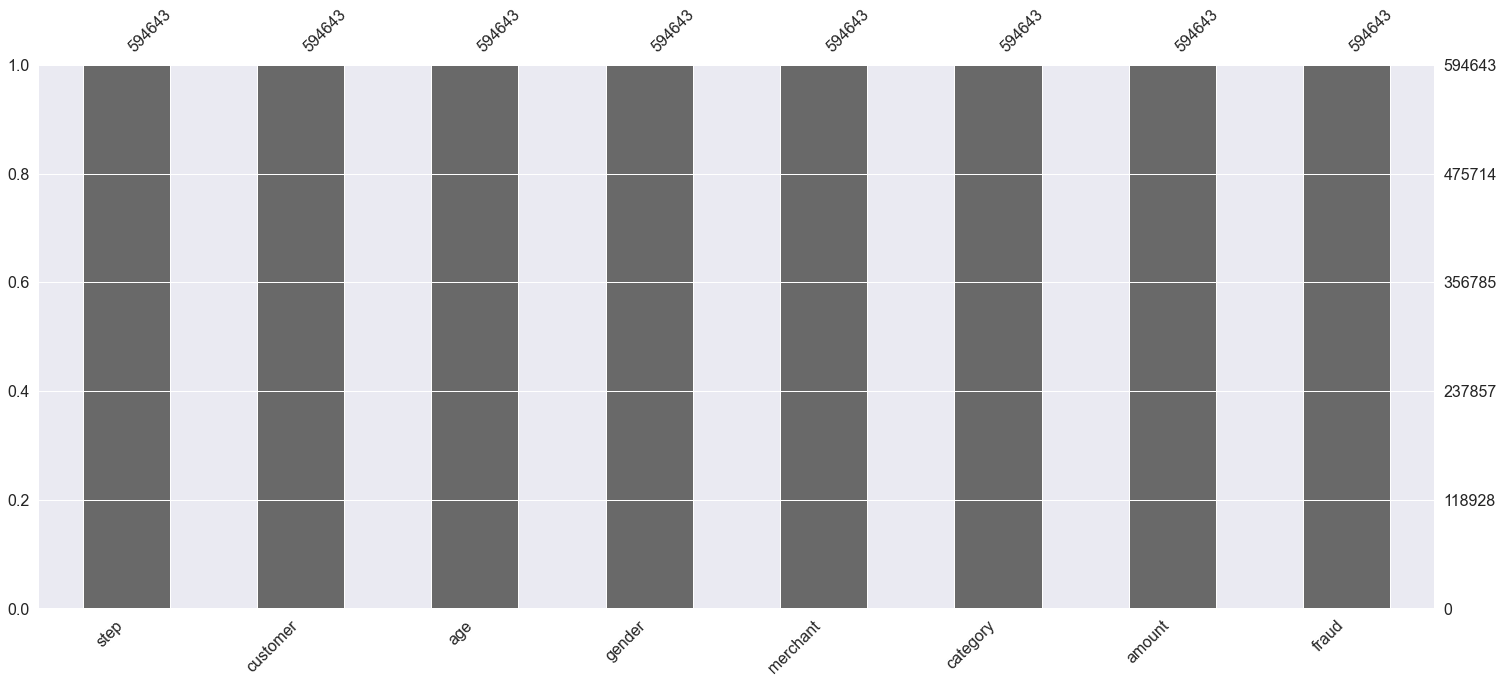

In [60]:
import missingno as msno
msno.bar(df)

## Data Visualizations

<AxesSubplot:xlabel='amount', ylabel='Count'>

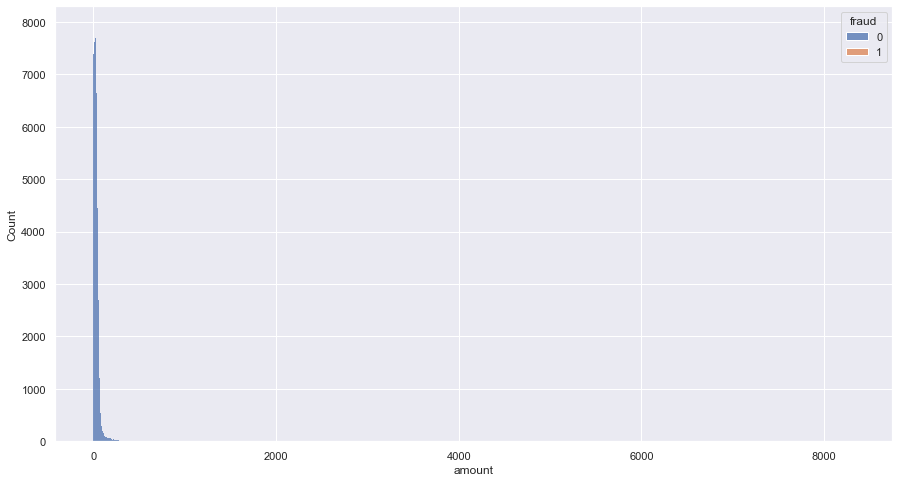

In [61]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=df, x="amount", hue="fraud", multiple="stack")

<AxesSubplot:xlabel='step', ylabel='Count'>

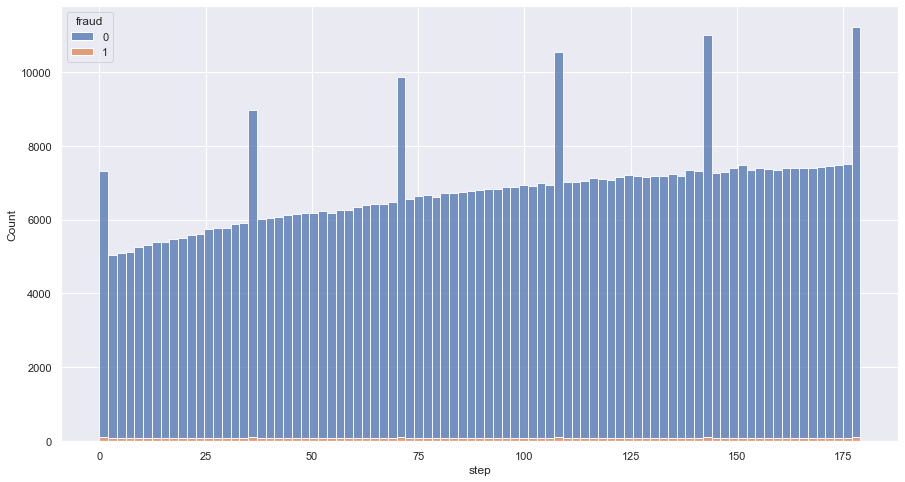

In [62]:
# frequency count of field by fraud
sns.histplot(data=df, x="step", hue="fraud", multiple="stack")

<AxesSubplot:xlabel='step', ylabel='amount'>

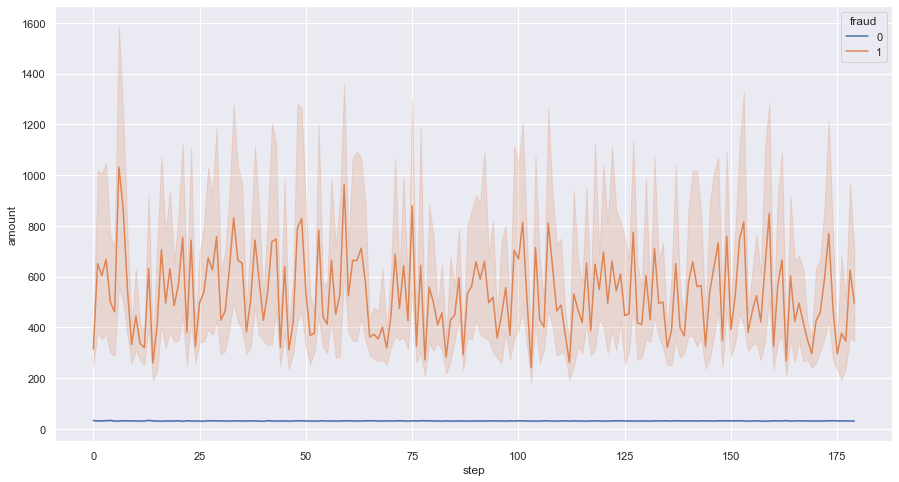

In [63]:
# mean transaction amount by field by fraud
# the lines are error bars representing the uncertainty around the mean estimate
sns.lineplot(data=df, x="step", y="amount", hue="fraud")

<AxesSubplot:xlabel='step', ylabel='amount'>

([<matplotlib.axis.XTick at 0x122adc2e970>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

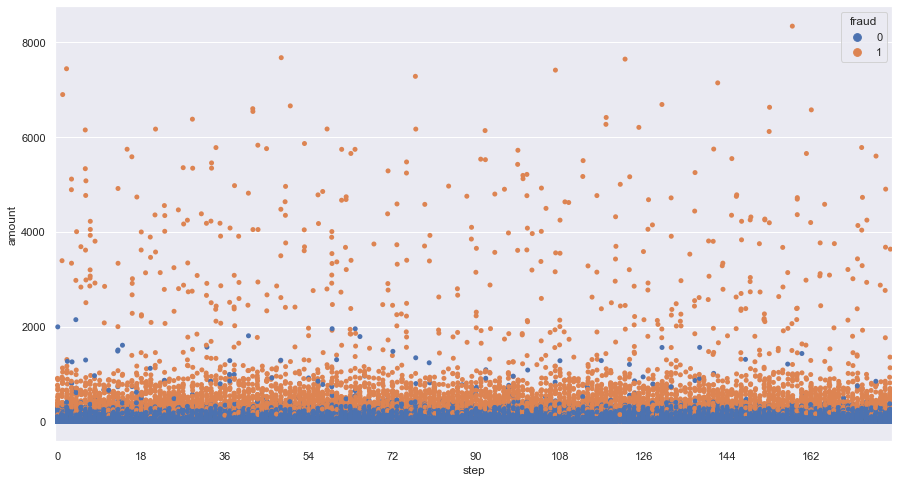

In [64]:
sns.stripplot(data=df, x="step", y="amount", hue="fraud")
plt.xticks(np.arange(0, 180, 18))

<AxesSubplot:xlabel='age', ylabel='Count'>

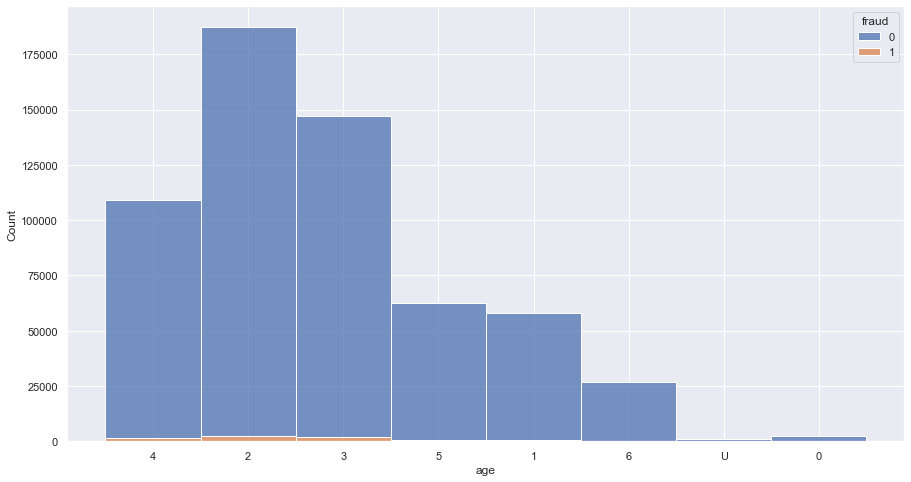

In [65]:
sns.histplot(data=df, x="age", hue="fraud", multiple="stack")

<AxesSubplot:xlabel='fraud', ylabel='Count'>

([<matplotlib.axis.XTick at 0x122adb2f730>,
 [Text(0, 0, ''), Text(0, 0, '')])

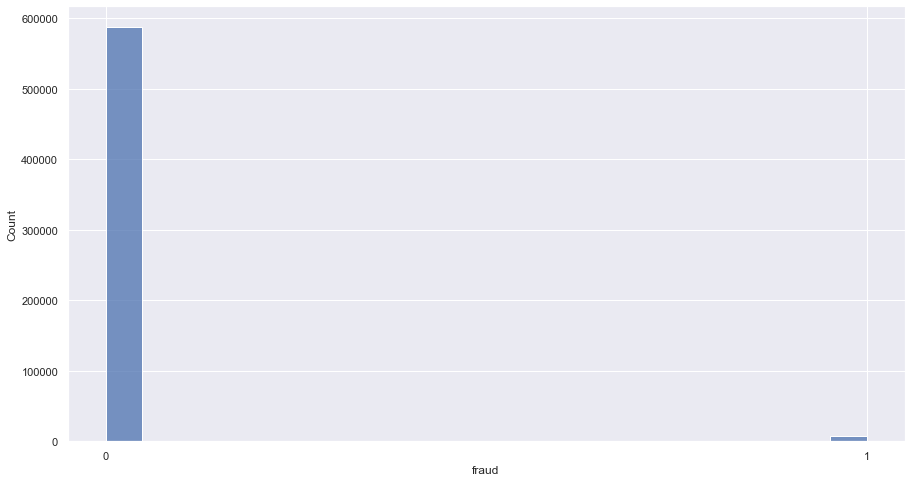

In [66]:
sns.histplot(data=df, x="fraud")
plt.xticks(np.arange(0, 2, 1))

<AxesSubplot:xlabel='age', ylabel='amount'>

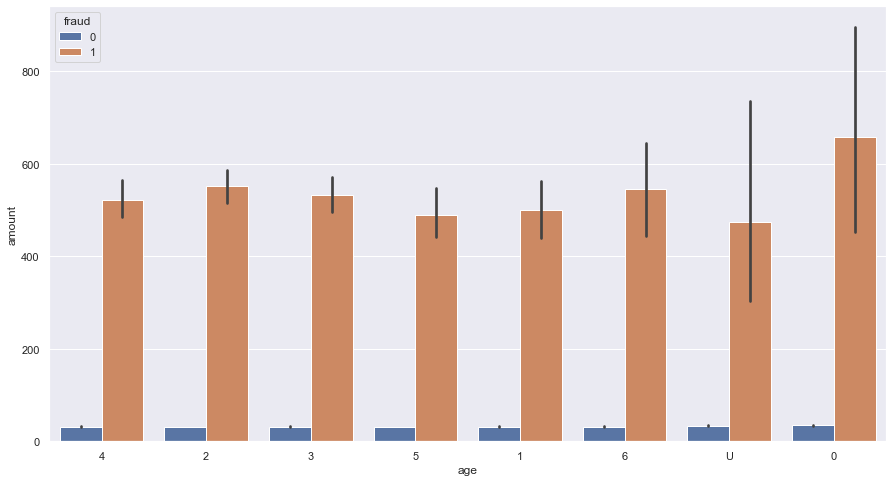

In [67]:
sns.barplot(data=df, x="age", y="amount", hue="fraud")

<AxesSubplot:xlabel='gender', ylabel='Count'>

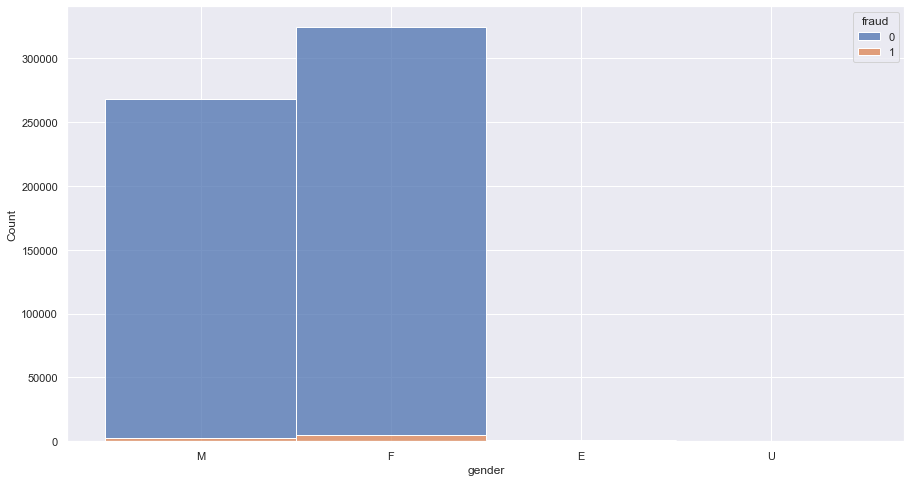

In [68]:
sns.histplot(data=df, x="gender", hue="fraud", multiple="stack")

<AxesSubplot:xlabel='gender', ylabel='amount'>

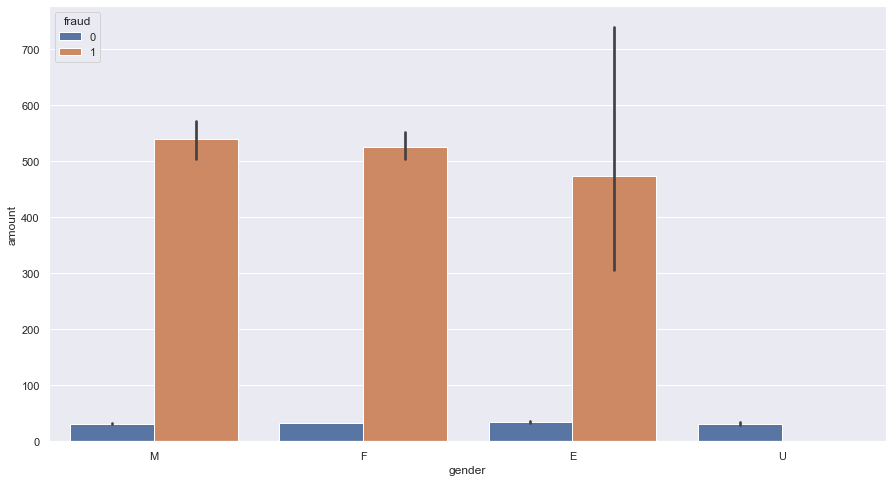

In [69]:
sns.barplot(data=df, x="gender", y="amount", hue="fraud")

<AxesSubplot:xlabel='Count', ylabel='category'>

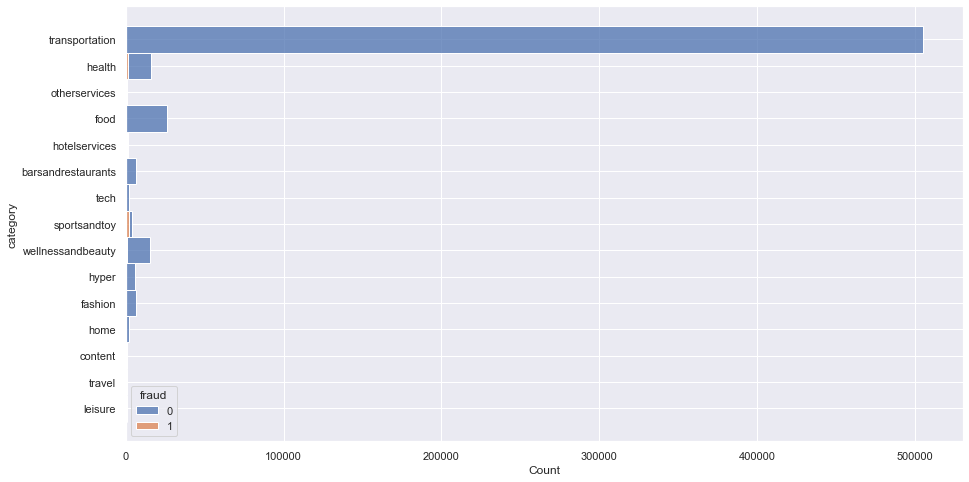

In [70]:
sns.histplot(data=df, y="category", hue="fraud", multiple="stack")

<AxesSubplot:xlabel='amount', ylabel='category'>

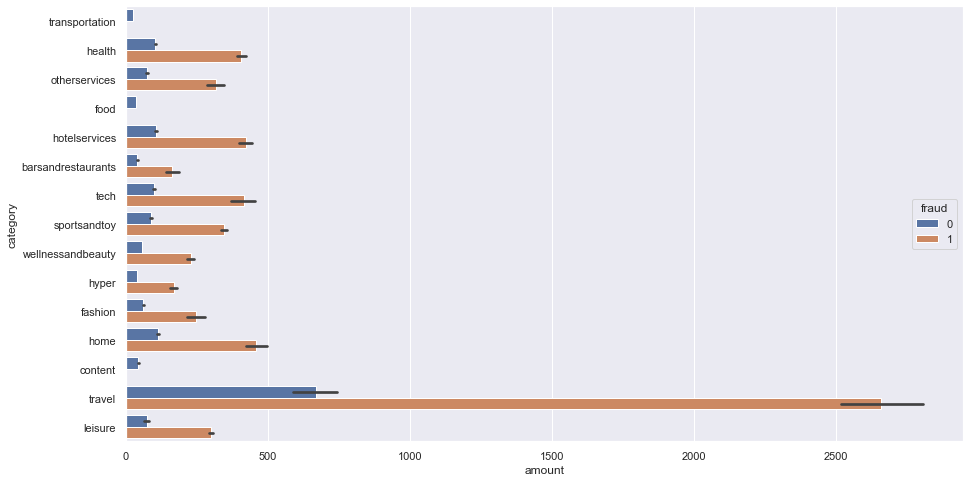

In [71]:
sns.barplot(data=df, y="category", x="amount", hue="fraud")

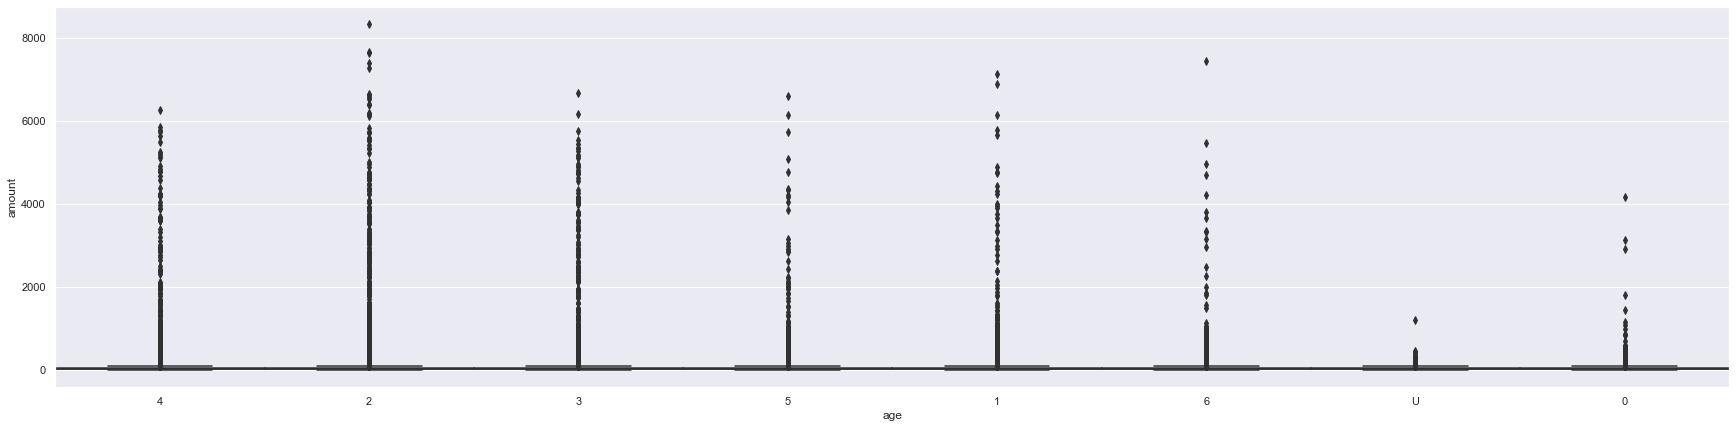

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig_dims = (30, 7)
fig, ax = plt.subplots(figsize = fig_dims)
bplot=sns.boxplot(data = df, y='amount', x='age', ax= ax, 
                 width=1,
                 palette="colorblind"
                 )

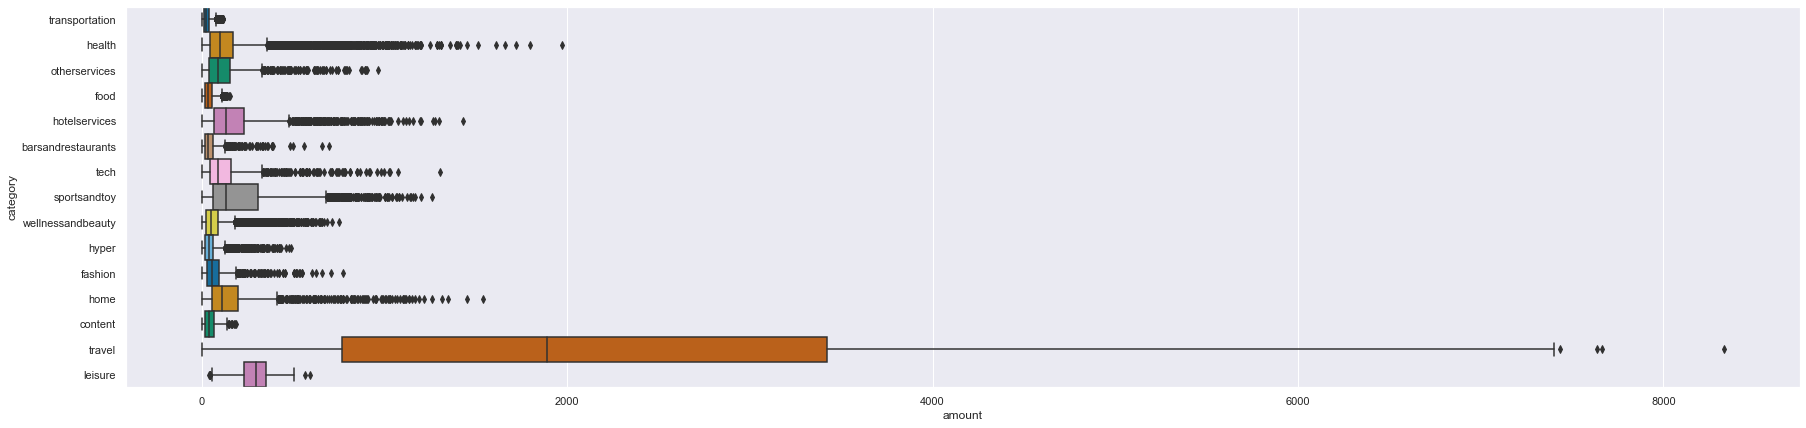

In [73]:
# boxplot of categories and amount
fig_dims = (30, 7)
fig, ax = plt.subplots(figsize = fig_dims)
bplot=sns.boxplot(data = df, y='category', x='amount', ax= ax,
                 width=1,
                 palette="colorblind",
                 )

Text(0.5, 0, 'gender')

Text(0, 0.5, 'transaction category')

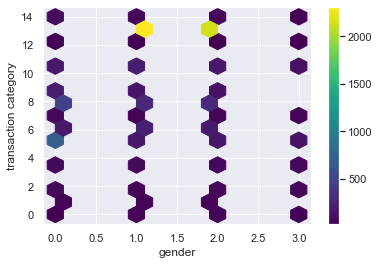

In [74]:
from sklearn.preprocessing import LabelEncoder
cols = ['age', 'gender', 'category']
lb_make = LabelEncoder()
for col in cols:
    df[col + "_code"] = lb_make.fit_transform(df[col])
      
ax = df.plot.hexbin(x= 'gender_code', 
                    y= 'category_code', 
                    C = 'amount', 
                    gridsize = 15,
                    cmap = "viridis",
                    sharex=False)

plt.xlabel('gender')
plt.ylabel('transaction category')

Text(0.5, 0, 'age')

Text(0, 0.5, 'transaction category')

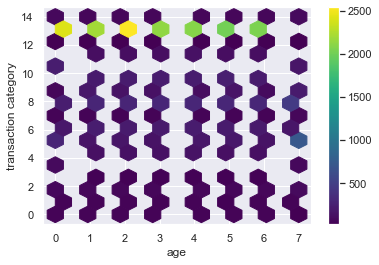

In [75]:
ax = df.plot.hexbin(x= 'age_code', 
                    y= 'category_code', 
                    C = 'amount', 
                    gridsize = 15,
                    cmap = "viridis",
                    sharex=False)
plt.xlabel('age')
plt.ylabel('transaction category')

<AxesSubplot:xlabel='age', ylabel='category'>

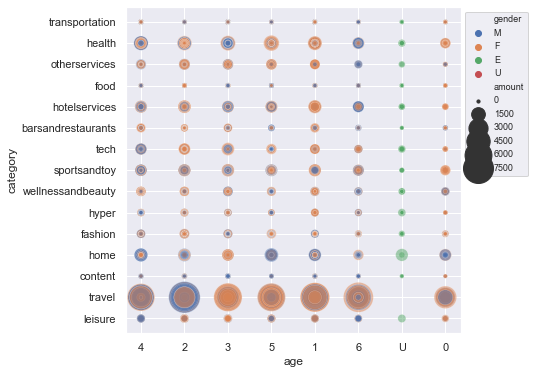

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df
fig_dims = (6, 6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.scatterplot(data=data, x = 'age', y = 'category', size='amount', hue='gender',alpha= 0.5, sizes=(10,1000), ax = ax)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)

Text(0, 0.5, 'Transactions')

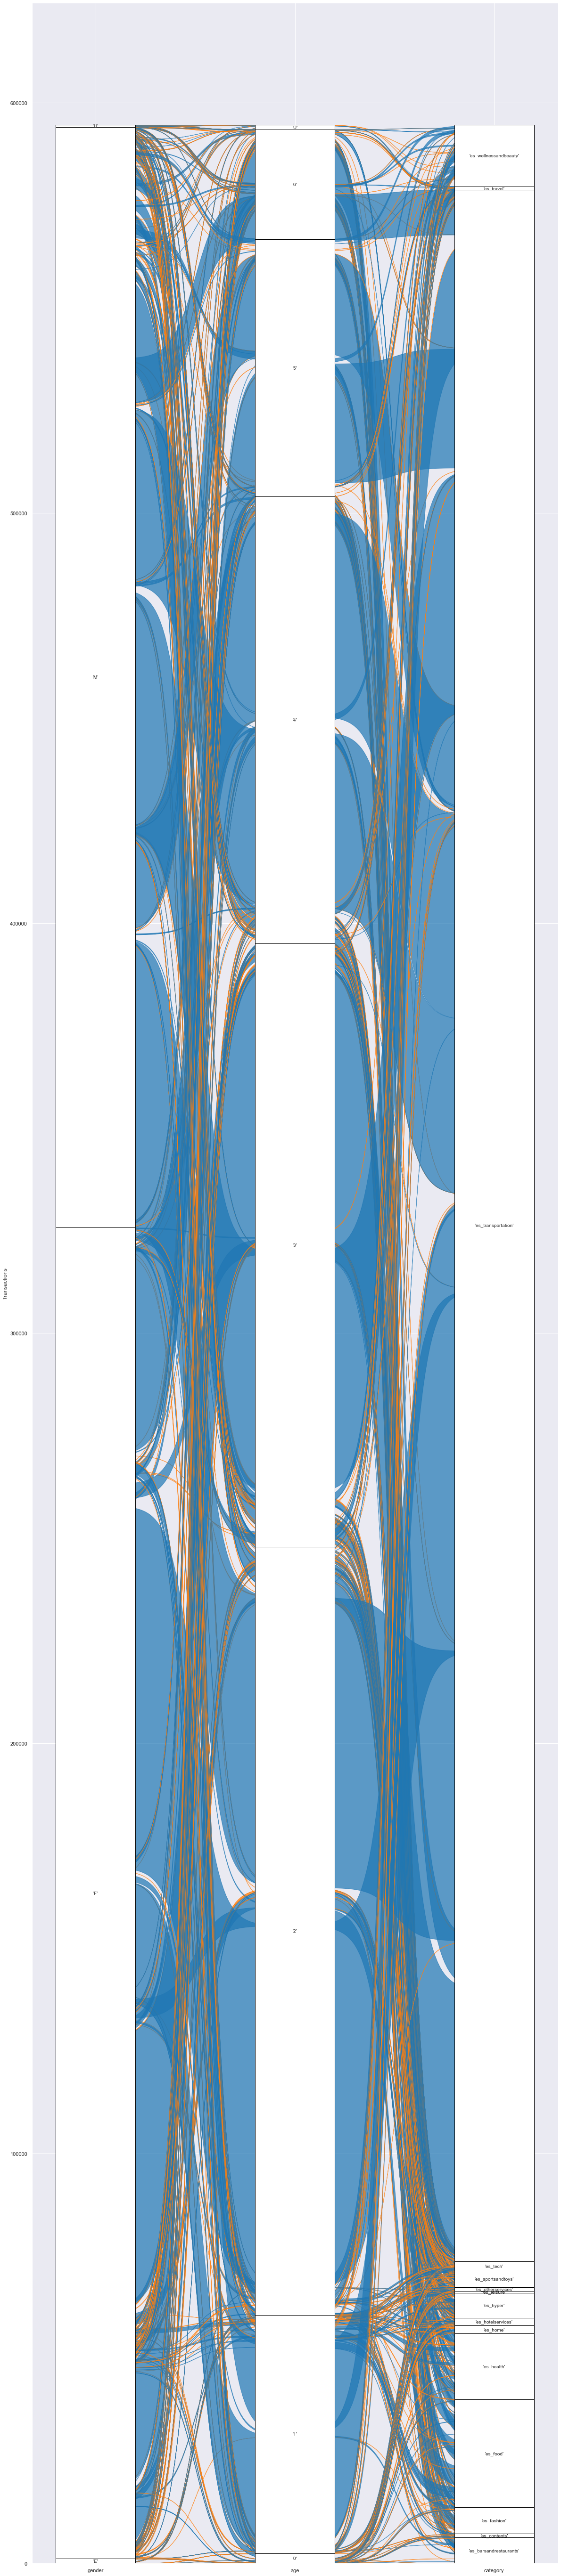

In [77]:
import pyalluvial.alluvial as alluvial 

freq_df = pd.read_csv("alluvial.csv")
fig = alluvial.plot(df=freq_df, xaxis_names=['gender','age', 'category'], y_name='count', alluvium='fraud', ignore_continuity=False, figsize=(20, 100))
plt.ylabel('Transactions')

## Analyses

In [78]:
# avg customer purchases per day
(df.groupby(["step"])["customer"].count()/df.groupby(["step"])["customer"].nunique()).mean()

# avg merchant sales per day
(df.groupby(["step"])["merchant"].count()/df.groupby(["step"])["merchant"].nunique()).mean()

1.0384574855236957

85.38324425832103

In [79]:
customer = {}
merchant = {}

for index, row in df.iterrows():
    #populating customer table
    if row.customer not in customer:
        customer[row.customer] = {}
        customer[row.customer]["purchases"] = []
        customer[row.customer]["stolen"] = []
        if row.fraud == 0:
            customer[row.customer]["transactions"] = 1
            customer[row.customer]["frauds"] = 0
            customer[row.customer]["purchases"].append(row.amount)
        elif row.fraud == 1:
            customer[row.customer]["transactions"] = 0
            customer[row.customer]["frauds"] = 1
            customer[row.customer]["stolen"].append(row.amount)   
    else:
        if row.fraud == 0:
            customer[row.customer]["transactions"] += 1
            customer[row.customer]["purchases"].append(row.amount)
        elif row.fraud == 1:
            customer[row.customer]["frauds"] += 1
            customer[row.customer]["stolen"].append(row.amount)
        
    #populating the merchant table    
    if row.merchant not in merchant:
        merchant[row.merchant] = {}
        merchant[row.merchant]["sales"] = []
        merchant[row.merchant]["stolen"] = []
        if row.fraud == 0:
            merchant[row.merchant]["transactions"] = 1
            merchant[row.merchant]["frauds"] = 0
            merchant[row.merchant]["sales"].append(row.amount)
        elif row.fraud == 1:
            merchant[row.merchant]["transactions"] = 0
            merchant[row.merchant]["frauds"] = 1
            merchant[row.merchant]["stolen"].append(row.amount)
    else:
        if row.fraud == 0:
            merchant[row.merchant]["transactions"] += 1
            merchant[row.merchant]["sales"].append(row.amount)
        elif row.fraud == 1:
            merchant[row.merchant]["frauds"] += 1
            merchant[row.merchant]["stolen"].append(row.amount)
        

In [80]:
# how many individual customers and merchants
len(customer)
len(merchant)

4112

50

In [81]:
c_df = pd.DataFrame.from_dict(customer, orient='index', columns=['purchases', 'stolen', 'transactions', 'frauds'])
len(c_df[c_df.frauds > 0])

1483

In [82]:
Pavg = []
for index, row in c_df.iterrows():
    Pavg.append(sum(row["purchases"]) / row["transactions"])
c_df["avg_purchase"] = Pavg

Tavg = []
for index, row in c_df.iterrows():
    if row.frauds > 0:
        Tavg.append(sum(row["stolen"]) / row["frauds"])
    else:
        Tavg.append(0)
c_df["avg_theft"] = Tavg

c_df[c_df.avg_theft > 0].head()

purchases  \
C765155274  [9.1, 14.39, 18.96, 36.39, 23.22, 8.41, 10.7, ...   
C623601481  [68.79, 58.38, 78.92, 2.78, 14.92, 31.77, 45.1...   
C194016923  [30.19, 31.45, 8.54, 5.15, 24.48, 32.2, 10.8, ...   
C834963773  [40.69, 4.93, 20.86, 37.22, 20.19, 11.84, 51.6...   
C124539163  [10.09, 21.87, 20.25, 14.75, 29.59, 17.67, 55....   

                                                stolen  transactions  frauds  \
C765155274                                    [752.23]           175       1   
C623601481  [431.88, 2372.22, 521.63, 1888.43, 541.61]            89       5   
C194016923                           [164.04, 1142.23]           158       2   
C834963773     [747.24, 667.76, 437.47, 96.59, 244.63]           178       5   
C124539163                            [4574.72, 85.87]            75       2   

            avg_purchase  avg_theft  
C765155274     39.201143    752.230  
C623601481     28.985955   1151.154  
C194016923     29.775127    653.135  
C834963773     33.194944    438.738  
C124539163     32.948533   2330.295

In [83]:
# avg customer transactions over 180 days
c_df["transactions"].mean()

# avg customer fraud over 180 days
c_df["frauds"].mean()

# avg customer expenditure during this period
c_df["avg_purchase"].mean()

# avg customer fraud during this period
c_df["avg_theft"].mean()

142.86065175097275

1.7509727626459144

34.34324428801419

197.37380636624428

In [84]:
m_df = pd.DataFrame.from_dict(merchant, orient='index', columns=['sales', 'stolen', 'transactions', 'frauds'])
len(m_df[m_df.frauds > 0])


30

In [85]:
Savg = []
for index, row in m_df.iterrows():
    Savg.append(sum(row["sales"]) / row["transactions"])
m_df["avg_sale"] = Savg

Favg = []
for index, row in m_df.iterrows():
    if row.frauds > 0:
        Favg.append(sum(row["stolen"]) / row["frauds"])
    else:
        Favg.append(0)
m_df["avg_theft"] = Favg

m_df[m_df.avg_theft > 0].head()

sales  \
M50039827    [68.79, 59.51, 98.24, 163.03, 115.87, 20.7, 10...   
M1888755466  [87.67, 25.0, 84.39, 24.29, 19.25, 116.01, 96....   
M480139044   [266.59, 44.14, 248.42, 55.82, 50.88, 83.93, 2...   
M692898500   [171.07, 109.26, 187.62, 237.48, 195.44, 27.84...   
M348875670   [114.54, 127.84, 199.95, 35.57, 134.89, 154.92...   

                                                        stolen  transactions  \
M50039827    [1025.56, 295.57, 493.79, 520.11, 130.56, 590....           870   
M1888755466  [66.6, 189.22, 41.48, 572.01, 386.21, 226.78, ...           684   
M480139044   [44.26, 324.5, 667.09, 520.5, 289.21, 560.9, 9...          1874   
M692898500   [112.55, 830.57, 143.09, 607.85, 904.51, 411.0...           884   
M348875670   [112.44, 321.46, 145.84, 0.8, 141.22, 420.81, ...            97   

             frauds    avg_sale   avg_theft  
M50039827        46  105.229092  409.394130  
M1888755466     228   75.685497  316.469605  
M480139044     1634  103.299803  406.857032  
M692898500       16  105.148835  418.039375  
M348875670       10  111.385361  211.485000

In [86]:
# avg merchant transactions over 180 days
m_df["transactions"].mean()

# avg merchant fraud over 180 days
m_df["frauds"].mean()

# avg merchant revenue during this period
m_df["avg_sale"].mean()

# avg merchant fraud during this period
m_df["avg_theft"].mean()

11748.86

144.0

129.176631312623

356.63137368984593

In [87]:
exploited = df[["merchant", "category"]][df.merchant.isin(m_df[m_df.frauds > m_df.transactions].index)]
exploited.groupby(["merchant"])["category"].unique()

merchant
M1294758098          [leisure]
M1353266412    [hotelservices]
M17379832       [sportsandtoy]
M1873032707    [hotelservices]
M2011752106    [hotelservices]
M2080407379           [travel]
M2122776122             [home]
M3697346             [leisure]
M732195782            [travel]
M857378720     [hotelservices]
M980657600      [sportsandtoy]
Name: category, dtype: object

In [88]:
cols = list(df.columns)
fields = list(set(cols) - set(["step", "customer", "merchant", "zipcodeOri", "zipMerchant"]))
for field in fields:
    print(df.groupby("fraud")[field].value_counts())

fraud  category          
0      transportation        505119
       food                   26254
       health                 14437
       wellnessandbeauty      14368
       fashion                 6338
       barsandrestaurants      6253
       hyper                   5818
       tech                    2212
       sportsandtoy            2020
       home                    1684
       hotelservices           1196
       content                  885
       otherservices            684
       travel                   150
       leisure                   25
1      sportsandtoy            1982
       health                  1696
       wellnessandbeauty        718
       travel                   578
       hotelservices            548
       leisure                  474
       home                     302
       hyper                    280
       otherservices            228
       tech                     158
       barsandrestaurants       120
       fashion                  116
Na

In [89]:
df.step.min()
df.step.max()

0

179

## Statistics

In [90]:
df.amount.describe()

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

array([[<AxesSubplot:title={'center':'amount'}>]], dtype=object)

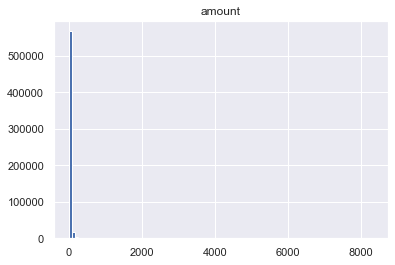

In [91]:
# spread of amount
import matplotlib
df.amount.describe()
df.hist(column = 'amount', bins=100)

In [92]:
from scipy.stats import kurtosis, skew

print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(df.amount) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df.amount) ))

excess kurtosis of normal distribution (should be 0): 1425.3116885527731
skewness of normal distribution (should be 0): 32.36575650728976


<AxesSubplot:ylabel='Density'>

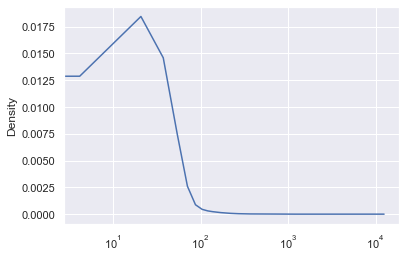

In [93]:
df['amount'].plot.density(logx=True)

In [94]:
# average amount per customer 
df.groupby(['customer'])['amount'].mean()

customer
C1000148617     35.091908
C100045114      90.336239
C1000699316     38.154894
C1001065306    204.754667
C1002658784     34.253282
                  ...    
C99729647       32.555771
C998690782      61.211637
C998987490      32.273107
C999393223      36.018944
C999723254      29.184016
Name: amount, Length: 4112, dtype: float64

In [95]:
# average amount per merchant
df.groupby(['merchant'])['amount'].mean()

merchant
M1053599405     103.072322
M117188757      105.102381
M1198415165      94.622911
M1294758098     289.667120
M1313686961      44.593586
M1352454843     109.981324
M1353266412     377.828462
M1400236507     116.117758
M1416436880      91.267818
M151143676       43.461014
M1535107174      74.734347
M1600850729      63.088700
M1649169323     123.378210
M1726401631     855.920000
M17379832       250.377270
M1741626453     173.341742
M1748431652      76.526022
M1788569036      94.689779
M1823072687      26.953146
M1842530320      99.586671
M1872033263     114.769143
M1873032707     376.237320
M1888755466     135.881524
M1913465890     104.441660
M1946091778      57.067848
M2011752106     323.581270
M2080407379    2299.512292
M209847108       62.391623
M2122776122     322.579824
M348875670      120.740467
M348934600       26.965542
M349281107       61.932704
M3697346        288.442597
M45060432       103.027016
M480139044      244.694475
M495352832     1618.723043
M50039827       120

In [96]:
# number of transactions per customer
df.customer.value_counts()

C1978250683    265
C1275518867    252
C806399525     237
C515668508     205
C1338396147    195
              ... 
C1345586046      6
C1156745710      6
C1404665203      5
C1743702978      5
C1809646275      5
Name: customer, Length: 4112, dtype: int64

In [97]:
# number of transactions per merchant 
df.merchant.value_counts()

M1823072687    299693
M348934600     205426
M85975013       26254
M1053599405      6821
M151143676       6373
M855959430       6098
M1946091778      5343
M1913465890      3988
M209847108       3814
M480139044       3508
M349281107       2881
M1600850729      2624
M1535107174      1868
M980657600       1769
M78078399        1608
M1198415165      1580
M840466850       1399
M1649169323      1173
M547558035        949
M50039827         916
M1888755466       912
M692898500        900
M1400236507       776
M1842530320       751
M732195782        608
M97925176         599
M45060432         573
M1741626453       528
M1313686961       527
M1872033263       525
M1352454843       370
M677738360        358
M2122776122       341
M923029380        323
M3697346          308
M17379832         282
M1748431652       274
M1873032707       250
M2011752106       244
M1416436880       220
M1294758098       191
M1788569036       181
M857378720        122
M348875670        107
M1353266412        78
M495352832

In [98]:
# IQR
Q1 = df.amount.quantile(0.25)
Q3 = df.amount.quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range for amount: " )
IQR

# Outliers 

Maximum = Q3 + (1.5 * IQR)
print("Maximum outliers for amount: ")
Maximum

Interquartile Range for amount: 


28.799999999999997

Maximum outliers for amount: 


85.74

In [99]:
Q1 = df.amount.quantile(0.25)
Q3 = df.amount.quantile(0.75)
IQR = Q3-Q1

#conditions = [(df.amount > (Q3+1.5*IQR)), (df.amount < (Q1-1.5*IQR)), (df.amount < (Q3+1.5*IQR)) | (df.amount > (Q1+1.5*IQR))]
conditions = [(df.amount > (Q3+1.5*IQR)), (df.amount < (Q3+1.5*IQR))]
#values = [1, 1, 0]
values = [1, 0]
df["IQR_outlier"] = np.select(conditions, values)
df.head()

step     customer age gender     merchant        category  amount  fraud  \
0     0  C1093826151   4      M   M348934600  transportation    4.55      0   
1     0   C352968107   2      M   M348934600  transportation   39.68      0   
2     0  C2054744914   4      F  M1823072687  transportation   26.89      0   
3     0  C1760612790   3      M   M348934600  transportation   17.25      0   
4     0   C757503768   5      M   M348934600  transportation   35.72      0   

   age_code  gender_code  category_code  IQR_outlier  
0         4            2             12            0  
1         2            2             12            0  
2         4            1             12            0  
3         3            2             12            0  
4         5            2             12            0

In [100]:
lowerBound = Q1 - 1.5*IQR
upperBound = Q3 + 1.5*IQR
print("The lower outlier bound for amount is: ", lowerBound) # non-existant
print("The upper outlier bound for amount is: ", upperBound)

The lower outlier bound for amount is:  -29.459999999999994
The upper outlier bound for amount is:  85.74


In [101]:
df.groupby("category").amount.mean()

category
barsandrestaurants      43.461014
content                 44.547571
fashion                 65.666642
food                    37.070405
health                 135.621367
home                   165.670846
hotelservices          205.614249
hyper                   45.970421
leisure                288.911303
otherservices          135.881524
sportsandtoy           215.715280
tech                   120.947937
transportation          26.958187
travel                2250.409190
wellnessandbeauty       65.511221
Name: amount, dtype: float64

In [102]:
mean = df["amount"].mean()
std = np.std(df["amount"])
print('mean of the dataset is', mean)
print('std. deviation is', std)

threshold = 1.5
outlier = []
for i in df["amount"]:
    z = (i-mean)/std
    if abs(z) > threshold:
        outlier.append(i)
print('The number of outliers in the dataset is', len(outlier))

mean of the dataset is 37.89013530807561
std. deviation is 111.40273725877348
The number of outliers in the dataset is 7341


In [103]:
categories = df.category.unique()

for cat in categories:
    print(cat)

transportation
health
otherservices
food
hotelservices
barsandrestaurants
tech
sportsandtoy
wellnessandbeauty
hyper
fashion
home
content
travel
leisure


In [104]:
categories = df.category.unique()
stats = []

for cat in categories:
    result = {}
    result['category'] = cat
    cat_df = df[df['category'] == cat]
    
    cat_mean = cat_df['amount'].mean()
    result['mean'] = cat_mean

    cat_std = np.std(cat_df['amount'])
    result['std'] = cat_std
    
    threshold = 1.5
    outlier = []
    for i in cat_df["amount"]:
        cat_z = (i-cat_mean)/cat_std
        if abs(cat_z) > threshold:
            outlier.append(i)
        result['num_of_outliers'] = len(outlier)
    stats.append(result)
    
print(stats)

[{'category': 'transportation', 'mean': 26.958187001478866, 'std': 17.527860309506565, 'num_of_outliers': 48662}, {'category': 'health', 'mean': 135.6213667637761, 'std': 153.1560169711103, 'num_of_outliers': 887}, {'category': 'otherservices', 'mean': 135.881524122807, 'std': 158.53973184764058, 'num_of_outliers': 74}, {'category': 'food', 'mean': 37.07040489068333, 'std': 24.99849330783595, 'num_of_outliers': 2266}, {'category': 'hotelservices', 'mean': 205.614248853211, 'std': 225.4457247642073, 'num_of_outliers': 181}, {'category': 'barsandrestaurants', 'mean': 43.4610136513416, 'std': 38.400959515453344, 'num_of_outliers': 325}, {'category': 'tech', 'mean': 120.94793670886075, 'std': 127.01787707562144, 'num_of_outliers': 111}, {'category': 'sportsandtoy', 'mean': 215.71527986006998, 'std': 215.64543192606433, 'num_of_outliers': 429}, {'category': 'wellnessandbeauty', 'mean': 65.51122099960229, 'std': 65.40673775291049, 'num_of_outliers': 664}, {'category': 'hyper', 'mean': 45.970

In [105]:
df["z_score"] = (df.amount-mean)/std
conditions = [(df.z_score > 1.5), (df.z_score < (-1.5)), (df.z_score < (1.5)) | (df.z_score > (-1.5))]
values = [1, 1, 0]
df["Z_outlier"] = np.select(conditions, values)
df.head()

step     customer age gender     merchant        category  amount  fraud  \
0     0  C1093826151   4      M   M348934600  transportation    4.55      0   
1     0   C352968107   2      M   M348934600  transportation   39.68      0   
2     0  C2054744914   4      F  M1823072687  transportation   26.89      0   
3     0  C1760612790   3      M   M348934600  transportation   17.25      0   
4     0   C757503768   5      M   M348934600  transportation   35.72      0   

   age_code  gender_code  category_code  IQR_outlier   z_score  Z_outlier  
0         4            2             12            0 -0.299276          0  
1         2            2             12            0  0.016067          0  
2         4            1             12            0 -0.098742          0  
3         3            2             12            0 -0.185275          0  
4         5            2             12            0 -0.019480          0

In [106]:
df.fraud.value_counts()
df.IQR_outlier.value_counts()
df.Z_outlier.value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

0    568845
1     25798
Name: IQR_outlier, dtype: int64

0    587302
1      7341
Name: Z_outlier, dtype: int64

In [107]:
df.groupby("category").amount.describe()

count         mean          std    min       25%  \
category                                                                  
barsandrestaurants    6373.0    43.461014    38.403973   0.01   17.1700   
content                885.0    44.547571    33.155431   0.01   17.5000   
fashion               6454.0    65.666642    55.487908   0.01   26.6550   
food                 26254.0    37.070405    24.998969   0.00   16.9625   
health               16133.0   135.621367   153.160764   0.03   45.3000   
home                  1986.0   165.670846   192.664019   0.13   53.6750   
hotelservices         1744.0   205.614249   225.510387   0.02   64.5900   
hyper                 6098.0    45.970421    45.538458   0.02   17.9300   
leisure                499.0   288.911303    95.816247  38.74  233.2650   
otherservices          912.0   135.881524   158.626722   0.06   38.6325   
sportsandtoy          4002.0   215.715280   215.672379   0.11   60.3900   
tech                  2370.0   120.947937   127.044683   0.09   43.0950   
transportation      505119.0    26.958187    17.527878   0.00   12.8000   
travel                 728.0  2250.409190  1758.585172   0.47  766.1150   
wellnessandbeauty    15086.0    65.511221    65.408906   0.02   25.1525   

                         50%        75%      max  
category                                          
barsandrestaurants    36.270    61.4900   695.63  
content               38.430    65.2000   185.13  
fashion               55.615    91.8175   773.61  
food                  33.475    53.5100   154.91  
health                97.890   170.5500  1972.81  
home                 111.310   197.4975  1540.23  
hotelservices        131.940   229.8950  1429.04  
hyper                 36.750    60.6775   488.02  
leisure              296.660   353.9050   592.03  
otherservices         87.280   154.1625   964.30  
sportsandtoy         134.175   309.3100  1258.33  
tech                  90.390   158.3325  1305.35  
transportation        24.960    38.6400   118.07  
travel              1888.460  3423.9975  8329.96  
wellnessandbeauty     51.895    86.9650   750.51

In [108]:
mfups = df[df.IQR_outlier != df.fraud]
mfups.groupby("category").fraud.count()

category
barsandrestaurants     601
content                105
fashion               1750
food                  1091
health                7676
home                   966
hotelservices          749
hyper                  499
leisure                  9
otherservices          302
sportsandtoy          1225
tech                  1099
transportation         869
travel                 142
wellnessandbeauty     3507
Name: fraud, dtype: int64

In [109]:
df.groupby("fraud").category.value_counts()

fraud  category          
0      transportation        505119
       food                   26254
       health                 14437
       wellnessandbeauty      14368
       fashion                 6338
       barsandrestaurants      6253
       hyper                   5818
       tech                    2212
       sportsandtoy            2020
       home                    1684
       hotelservices           1196
       content                  885
       otherservices            684
       travel                   150
       leisure                   25
1      sportsandtoy            1982
       health                  1696
       wellnessandbeauty        718
       travel                   578
       hotelservices            548
       leisure                  474
       home                     302
       hyper                    280
       otherservices            228
       tech                     158
       barsandrestaurants       120
       fashion                  116
Na

In [110]:
df.groupby("Z_outlier").category.value_counts()

Z_outlier  category          
0          transportation        505119
           food                   26254
           wellnessandbeauty      14703
           health                 13349
           fashion                 6372
           barsandrestaurants      6340
           hyper                   6000
           sportsandtoy            2592
           tech                    2045
           home                    1522
           hotelservices           1234
           content                  885
           otherservices            747
           leisure                   88
           travel                    52
1          health                  2784
           sportsandtoy            1410
           travel                   676
           hotelservices            510
           home                     464
           leisure                  411
           wellnessandbeauty        383
           tech                     325
           otherservices            165
          

In [111]:
fups = df[df.Z_outlier != df.fraud]
fups.groupby("category").fraud.count()

category
barsandrestaurants      87
fashion                 80
health                2096
home                   314
hotelservices          256
hyper                  182
leisure                 63
otherservices           95
sportsandtoy           774
tech                   249
travel                 142
wellnessandbeauty      413
Name: fraud, dtype: int64

In [112]:
fups.groupby("category").amount.describe()

count        mean         std    min       25%      50%  \
category                                                                       
barsandrestaurants    87.0   97.876897   59.005664   2.37   44.0600   95.160   
fashion               80.0  140.061625   76.783754   4.35   62.1925  141.215   
health              2096.0  218.509976   84.226430   0.03  205.8175  230.155   
home                 314.0  228.047484   88.928099   0.19  205.5275  229.510   
hotelservices        256.0  159.368789   87.729099   0.41   80.4825  178.150   
hyper                182.0  100.178407   61.745284   1.13   45.4700   96.350   
leisure               63.0  161.879365   34.562578  45.46  147.3400  170.530   
otherservices         95.0  125.645579   71.129121   7.66   65.6300  127.240   
sportsandtoy         774.0  119.334457   71.836680   0.42   59.4550  116.925   
tech                 249.0  227.136827   72.764216   9.71  211.7400  231.520   
travel               142.0  706.589296  484.045134   7.40  322.5850  652.530   
wellnessandbeauty    413.0  110.304504   68.699545   0.04   48.2800  107.180   

                         75%      max  
category                               
barsandrestaurants  142.5350   203.28  
fashion             211.5425   269.39  
health              265.8600   468.81  
home                279.0150   523.11  
hotelservices       225.5100   345.87  
hyper               159.9400   203.80  
leisure             188.6950   202.93  
otherservices       189.6050   298.81  
sportsandtoy        173.9250   374.46  
tech                264.0000   454.83  
travel              951.3025  2144.86  
wellnessandbeauty   168.9300   260.12

In [114]:
df["category_code"].groupby(df["category"]).unique()

category
barsandrestaurants     [0]
content                [1]
fashion                [2]
food                   [3]
health                 [4]
home                   [5]
hotelservices          [6]
hyper                  [7]
leisure                [8]
otherservices          [9]
sportsandtoy          [10]
tech                  [11]
transportation        [12]
travel                [13]
wellnessandbeauty     [14]
Name: category_code, dtype: object

In [115]:
df["gender_code"].groupby(df["gender"]).unique()

gender
E    [0]
F    [1]
M    [2]
U    [3]
Name: gender_code, dtype: object

In [116]:
df["age_code"].groupby(df["age"]).unique()

age
0    [0]
1    [1]
2    [2]
3    [3]
4    [4]
5    [5]
6    [6]
U    [7]
Name: age_code, dtype: object

In [117]:
import seaborn as sns
sns.pairplot(df, hue="fraud")

KeyboardInterrupt: 

In [ ]:
# correlation heatmap 
df.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
# covariance 
df.cov()

In [ ]:
#Pearson chi square test age and fraud
#finding the association between age and fraud

from scipy.stats import chi2_contingency
from scipy.stats import chi2

columns = ['age', 'gender', 'category']
stats = []

for col in columns:
    result = {}
    myCrosstable = pd.crosstab(df[col], df['fraud'])
    chiVal, pVal, dof, exp = chi2_contingency(myCrosstable)


#interpret test-statistic

#Test Statistic >= Critical Value: reject null hypothesis, dependent (Ha)
#Test Statistic < Critical Value: fail to reject null hypothesis, independent (Ho)
#chi.ppf(q, df, loc=0, scale=1) inverset CDF

    prob = 0.95 #significant value = 1 - 0.95 = 0.05
    critical = chi2.ppf(prob, dof)
    result['column'] = col
    result['critical'] = round(critical, 2)
    result['chiVal'] = round(chiVal, 2)
    if chiVal >= critical:
        result['H0'] = 'reject/dependent'
    else:
        result['H0'] = 'accepted/independent'

    
# interpret 
# p-value <= alpha: reject null hypothesis, dependent (Ha)
# p-value > alpha: fail to reject null hypothesis, independedt (Ho)

    alpha = 0.05
    result['significance'] = round(alpha, 2)
    result['p'] = round(pVal, 2)
    if pVal <= alpha:
        result['dependent'] = 'Dependent (reject H0)'
    else:
        result['independent'] = 'Independent (fail to reject H0)'
    stats.append(result)

In [ ]:
stats

## Modelling

In [ ]:
# creating feature set

X =  df[["age_code", "gender_code", "category_code", "amount"]]

X.head()

In [ ]:
y = df["fraud"]
y.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

classifiers = [
    LogisticRegression(solver='liblinear', multi_class='ovr'),
    LinearSVC(dual=False, max_iter=2000),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(random_state=1),
    RandomForestClassifier(random_state=1),
    MLPClassifier(random_state=1)
]

In [ ]:
from sklearn import model_selection
results = []
names = []
for classifier in classifiers:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(classifier, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(classifier)
	msg = "%s: %f (%f)" % (classifier, cv_results.mean(), cv_results.std())
	print(msg)

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Demo

In [ ]:
classifier = MLPClassifier(random_state=1)
cls = classifier.fit(X_train, y_train)  

In [ ]:
# female aged 19-25 spending 5000 euro on sports and toys

y_output = cls.predict([[1, 1, 10, 5000]])
print(y_output)

In [ ]:
# female aged 19-25 spending 50 euro on sports and toys

y_output = cls.predict([[1, 1, 10, 50]])
print(y_output)

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

RFC = RandomForestClassifier(random_state=1, max_depth = 3).fit(X_train, y_train)  

plt.figure(figsize=(30,30))
tree.plot_tree(RFC.estimators_[0],
                 feature_names=["age_code", "gender_code", "category_code", "amount"],
                 class_names=["0", "1"],
                 filled = True)